In [28]:
import numpy as np
import cv2 as cv

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import losses
from keras.applications import vgg16
import matplotlib.pyplot as plt

In [25]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

# Train the model, iterating on the data in batches of 32 samples
history=model.fit(data, labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 121us/step - loss: 0.7081 - accuracy: 0.4920
Epoch 2/10
1000/1000 [==============================] - 0s 67us/step - loss: 0.7001 - accuracy: 0.5240
Epoch 3/10
1000/1000 [==============================] - 0s 62us/step - loss: 0.6930 - accuracy: 0.5370
Epoch 4/10
1000/1000 [==============================] - 0s 61us/step - loss: 0.6913 - accuracy: 0.5390
Epoch 5/10
1000/1000 [==============================] - 0s 60us/step - loss: 0.6837 - accuracy: 0.5630
Epoch 6/10
1000/1000 [==============================] - 0s 57us/step - loss: 0.6782 - accuracy: 0.5710
Epoch 7/10
1000/1000 [==============================] - 0s 57us/step - loss: 0.6749 - accuracy: 0.5750
Epoch 8/10
1000/1000 [==============================] - 0s 50us/step - loss: 0.6715 - accuracy: 0.5890
Epoch 9/10
1000/1000 [==============================] - 0s 58us/step - loss: 0.6695 - accuracy: 0.5820
Epoch 10/10
1000/1000 [==============================] - 0s 53us/step - 

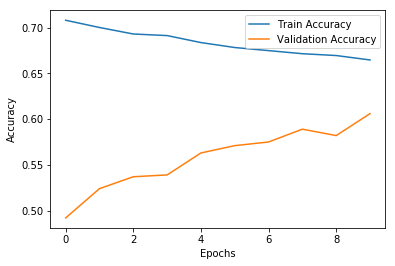

In [26]:
plt.plot(history.history['loss'], label='Train Accuracy')
plt.plot(history.history['accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [22]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
history=model.fit(data, one_hot_labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 0s 101us/step - loss: 2.3580 - accuracy: 0.1040
Epoch 2/10
1000/1000 [==============================] - 0s 70us/step - loss: 2.3095 - accuracy: 0.1210
Epoch 3/10
1000/1000 [==============================] - 0s 52us/step - loss: 2.2929 - accuracy: 0.1250
Epoch 4/10
1000/1000 [==============================] - 0s 67us/step - loss: 2.2861 - accuracy: 0.1330
Epoch 5/10
1000/1000 [==============================] - 0s 55us/step - loss: 2.2798 - accuracy: 0.1380
Epoch 6/10
1000/1000 [==============================] - 0s 62us/step - loss: 2.2747 - accuracy: 0.1530
Epoch 7/10
1000/1000 [==============================] - 0s 67us/step - loss: 2.2656 - accuracy: 0.1520
Epoch 8/10
1000/1000 [==============================] - 0s 65us/step - loss: 2.2593 - accuracy: 0.1570
Epoch 9/10
1000/1000 [==============================] - 0s 61us/step - loss: 2.2510 - accuracy: 0.1670
Epoch 10/10
1000/1000 [==============================] - 0s 76us/step - 

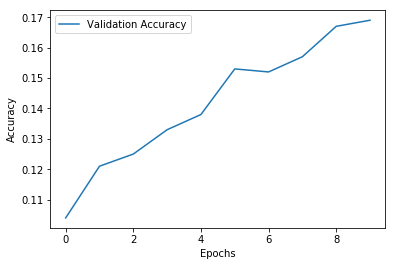

In [24]:
plt.plot(history.history['accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

(150, 268)


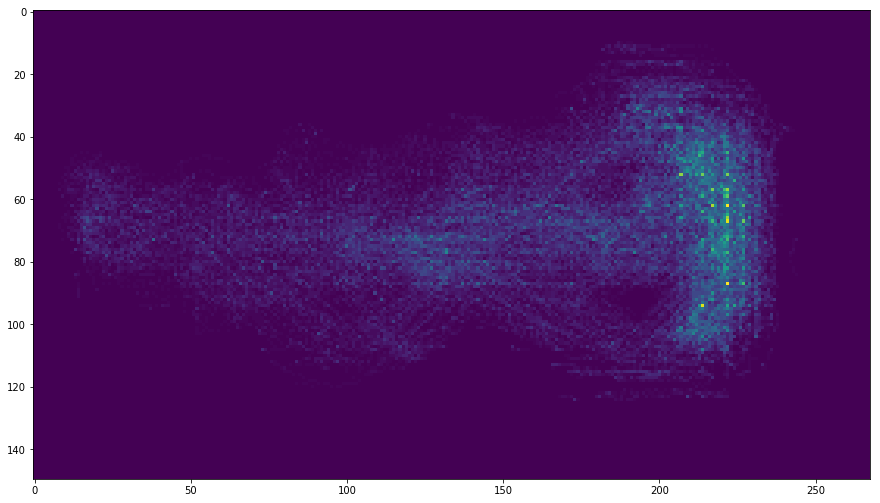

In [29]:
#Visualizamos nuestros datos (FP,FV,FA).
capa = 1
video = "100-1"
image = cv.cvtColor(cv.imread("ImagenesClasificacion/capa"+str(capa)+"/"+video+".png"),cv.COLOR_RGB2GRAY)
plt.figure(figsize=(15,15))
plt.imshow(image)
print(image.shape)

In [31]:
#Ahora construimos el arreglo de datos
datos = []
labels = []

for i in range(21):
  if(i<10):
    for k in range(5):
      image1 = cv.cvtColor(cv.imread("ImagenesClasificacion/capa1/10"+str(i)+"-"+str(k+1)+".png"),cv.COLOR_RGB2GRAY)
      image2 = cv.cvtColor(cv.imread("ImagenesClasificacion/capa2/10"+str(i)+"-"+str(k+1)+".png"),cv.COLOR_RGB2GRAY)
      image3 = cv.cvtColor(cv.imread("ImagenesClasificacion/capa3/10"+str(i)+"-"+str(k+1)+".png"),cv.COLOR_RGB2GRAY)
      dato = np.zeros(shape=(image1.shape[0],image1.shape[1],3)) 
      dato[:,:,0] = image1
      dato[:,:,1] = image2
      dato[:,:,2] = image3
      datos.append(dato)
      if(i<=4):
        labels.append(0)
      else:
        labels.append(1)
  else:
    for k in range(5):
      image1 = cv.cvtColor(cv.imread("ImagenesClasificacion/capa1/1"+str(i)+"-"+str(k+1)+".png"),cv.COLOR_RGB2GRAY)
      image2 = cv.cvtColor(cv.imread("ImagenesClasificacion/capa2/1"+str(i)+"-"+str(k+1)+".png"),cv.COLOR_RGB2GRAY)
      image3 = cv.cvtColor(cv.imread("ImagenesClasificacion/capa3/1"+str(i)+"-"+str(k+1)+".png"),cv.COLOR_RGB2GRAY)
      dato = np.zeros(shape=(image1.shape[0],image1.shape[1],3)) 
      dato[:,:,0] = image1
      dato[:,:,1] = image2
      dato[:,:,2] = image3
      datos.append(dato)
      if(i == 10):
        labels.append(1)
      elif(i <= 16 and i >= 11):
        labels.append(2)
      else:
        labels.append(3)
for k in range(5):
  image1 = cv.cvtColor(cv.imread("ImagenesClasificacion/capa1/ACL099-"+str(k+1)+".png"),cv.COLOR_RGB2GRAY)
  image2 = cv.cvtColor(cv.imread("ImagenesClasificacion/capa2/ACL099-"+str(k+1)+".png"),cv.COLOR_RGB2GRAY)
  image3 = cv.cvtColor(cv.imread("ImagenesClasificacion/capa3/ACL099-"+str(k+1)+".png"),cv.COLOR_RGB2GRAY)
  dato = np.zeros(shape=(image1.shape[0],image1.shape[1],3)) 
  dato[:,:,0] = image1
  dato[:,:,1] = image2
  dato[:,:,2] = image3
  datos.append(dato)
  labels.append(0)

datos = np.array(datos)
labels = np.array(labels)
print(datos.shape)
print(labels.shape)

(110, 150, 268, 3)
(110,)


In [32]:
from sklearn.model_selection import train_test_split
#Ahora procedemos a partir los datos
X_train, X_test, y_train, y_test = train_test_split(datos, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(np.unique(y_train),np.unique(y_test))

(88, 150, 268, 3) (22, 150, 268, 3) (88,) (22,)
[0 1 2 3] [0 1 2 3]


In [38]:
X_train = X_train.reshape([-1, 150, 268, 3])
X_test = X_test.reshape([-1, 150, 268, 3])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [39]:
model = vgg16.VGG16(include_top=True, weights=None, input_tensor=None, input_shape=(150,268,3), pooling=None, classes=4)

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 268, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 268, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 268, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 134, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 134, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 134, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 67, 128)       0     

In [41]:
vgg16 = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test), shuffle=True) 

ValueError: Error when checking target: expected predictions to have shape (4,) but got array with shape (1,)